In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')
dosya_yolu = '/content/drive/MyDrive/UrbanSound8K/fold1/7061-6-0-0.wav'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# 1. Ses dosyasını yükleme
TARGET_SR = 22050
y, sr = librosa.load(dosya_yolu, sr=TARGET_SR)
print(f"Yüklenen dosya: {dosya_yolu.split(os.sep)[-1]} | Örnekleme Hızı (sr): {sr} Hz")

Yüklenen dosya: 7061-6-0-0.wav | Örnekleme Hızı (sr): 22050 Hz


In [10]:
# 2. Mel-Spektrogram Özniteliklerini Çıkarma
# n_mels=128, Mel bandının sayısını belirler.
mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mels_db = librosa.power_to_db(mels, ref=np.max) # Enerjiyi logaritmik (dB) ölçeğe dönüştürme

print("-" * 50)

--------------------------------------------------


In [11]:
print("--- Sayısal İncelenme ---")
print(f"Mel-Spektrogram Matrisinin Şekli (Shape): {mels_db.shape}")
print(f"Matrisin Veri Tipi (Dtype): {mels_db.dtype}")

--- Sayısal İncelenme ---
Mel-Spektrogram Matrisinin Şekli (Shape): (128, 97)
Matrisin Veri Tipi (Dtype): float32


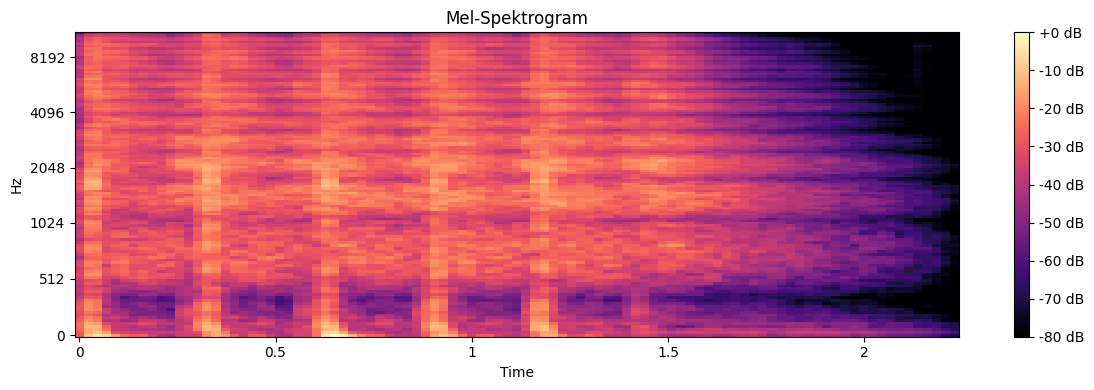


--- Ses Dosyası Oynatılıyor ---


In [12]:
# 1. Mel-Spektrogramı görselleştirme
plt.figure(figsize=(12, 4))
librosa.display.specshow(mels_db, x_axis='time', y_axis='mel', sr=sr, fmax=sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spektrogram')
plt.tight_layout()
plt.show()

# 2. Ses dosyasını çalma
print("\n--- Ses Dosyası Oynatılıyor ---")
display(Audio(y, rate=sr))